HEART FAILURE PREDICTION

Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importing Dataset

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Dataset Distribution

In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Check Missing Value

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [8]:
df['DEATH_EVENT'].value_counts(normalize=True)*100

0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64

In [9]:
df.duplicated().sum()

0

Correlation Matrix

In [10]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Heat Map

<AxesSubplot:>

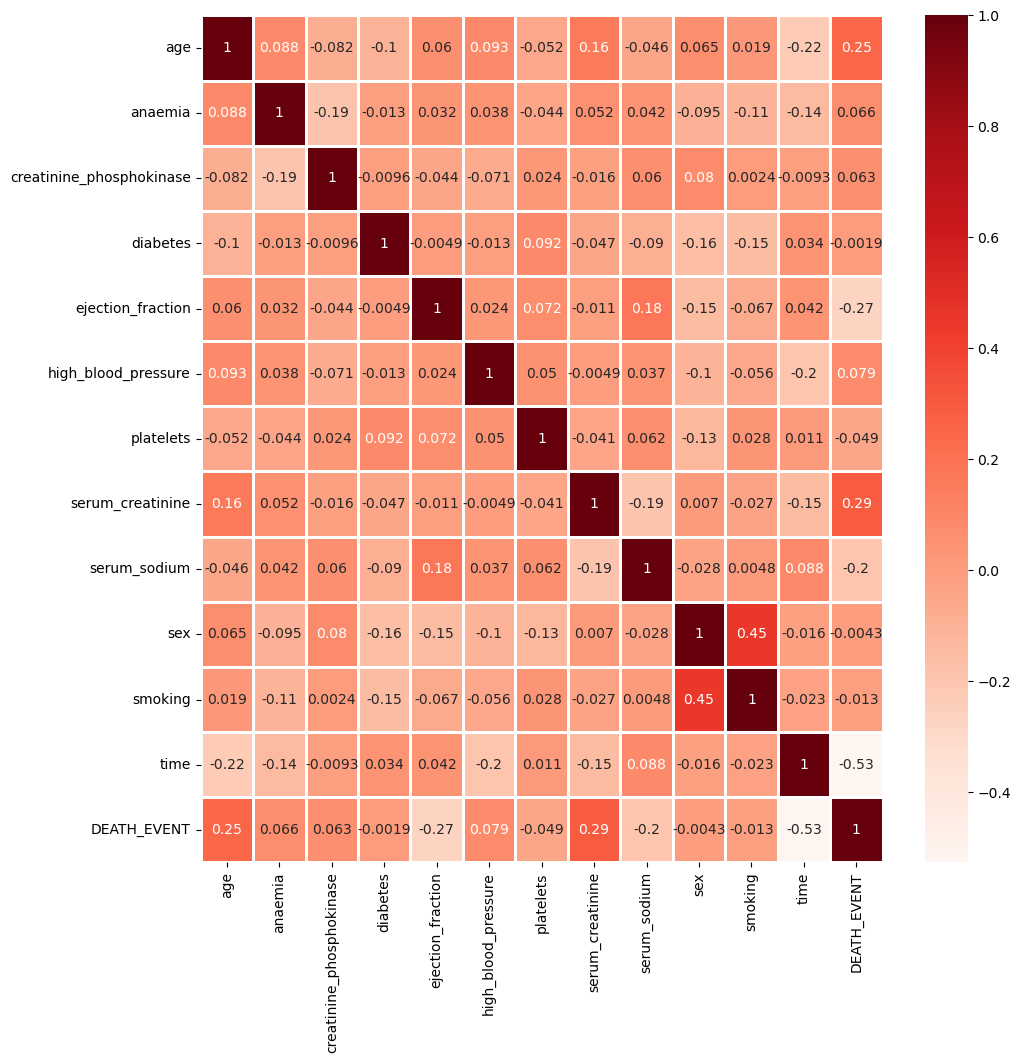

In [11]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),cmap="Reds",annot=True,linewidth =1)

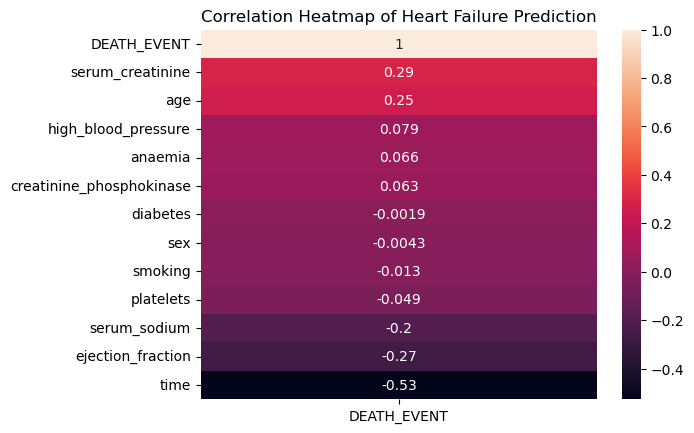

In [12]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot = True)
plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

Outlier Detection

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='creatinine_phosphokinase'>

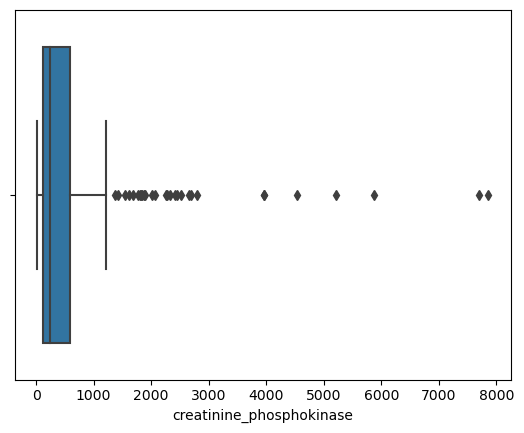

In [13]:
sns.boxplot(df['creatinine_phosphokinase'])

Normal range:10-120mcg/L

In [14]:
percentile25 = df['creatinine_phosphokinase'].quantile(0.25)
percentile75 = df['creatinine_phosphokinase'].quantile(0.75)

In [15]:
iqr=percentile75-percentile25
upper_limit = 3000
lower_limit = percentile25 - 1.5 * iqr

In [16]:
df[df['creatinine_phosphokinase'] > upper_limit]
df[df['creatinine_phosphokinase'] < lower_limit]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [17]:
new_df = df.copy()
new_df = df[df['creatinine_phosphokinase'] < upper_limit]
new_df.shape
# new_df_cap['creatinine_phosphokinase'] = np.where(
#     new_df_cap['creatinine_phosphokinase'] > upper_limit,
#     upper_limit,
#     np.where(
#         new_df_cap['creatinine_phosphokinase'] < lower_limit,
#         lower_limit,
#         new_df_cap['creatinine_phosphokinase']))

(292, 13)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

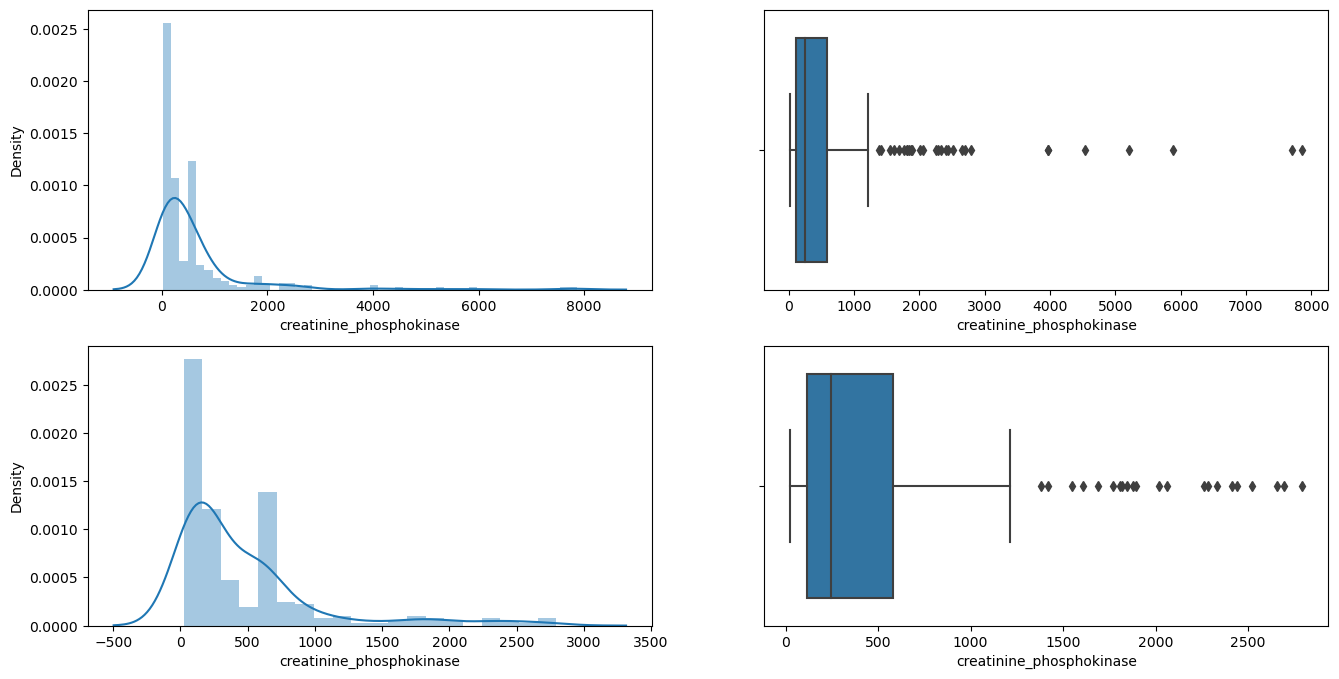

In [18]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['creatinine_phosphokinase'])
plt.subplot(2,2,2)
sns.boxplot(df['creatinine_phosphokinase'])
plt.subplot(2,2,3)
sns.distplot(new_df['creatinine_phosphokinase'])
plt.subplot(2,2,4)
sns.boxplot(new_df['creatinine_phosphokinase'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='serum_sodium'>

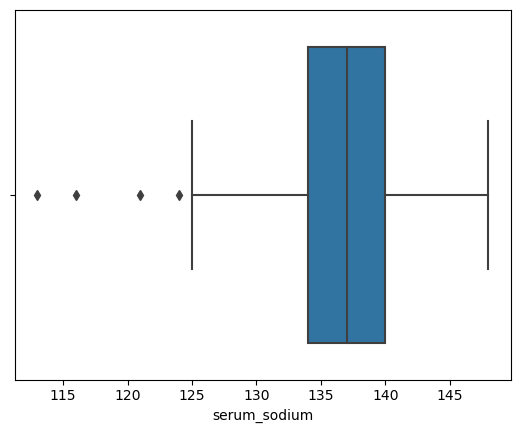

In [19]:
sns.boxplot(df['serum_sodium'])

Normal Range: 136-145 mmol/L

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='platelets'>

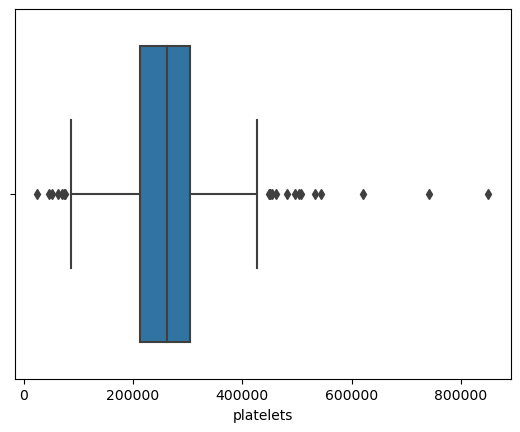

In [20]:
sns.boxplot(df['platelets'])

Normal range: 150,000-450,000

In [23]:
percentile25 = df['platelets'].quantile(0.25)
percentile75 = df['platelets'].quantile(0.75)

In [24]:
iqr=percentile75-percentile25
upper_limit = 600000
lower_limit = percentile25 - 1.5 * iqr
df[df['platelets'] > upper_limit]
df[df['platelets'] < lower_limit]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
15,82.0,1,379,0,50,0,47000.0,1.3,136,1,0,13,1
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126,1
167,59.0,0,66,1,20,0,70000.0,2.4,134,1,0,135,1
200,63.0,1,1767,0,45,0,73000.0,0.7,137,1,0,186,0
230,60.0,0,166,0,30,0,62000.0,1.7,127,0,0,207,1
277,70.0,0,582,1,38,0,25100.0,1.1,140,1,0,246,0
281,70.0,0,582,0,40,0,51000.0,2.7,136,1,1,250,0


In [25]:
new_df = df.copy()
new_df = df[df['platelets'] < upper_limit]
new_df.shape
# new_df_cap['platelets'] = np.where(
#     new_df_cap['platelets'] > upper_limit,
#     upper_limit,
#     np.where(
#         new_df_cap['platelets'] < lower_limit,
#         lower_limit,
#         new_df_cap['platelets']))

(296, 13)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

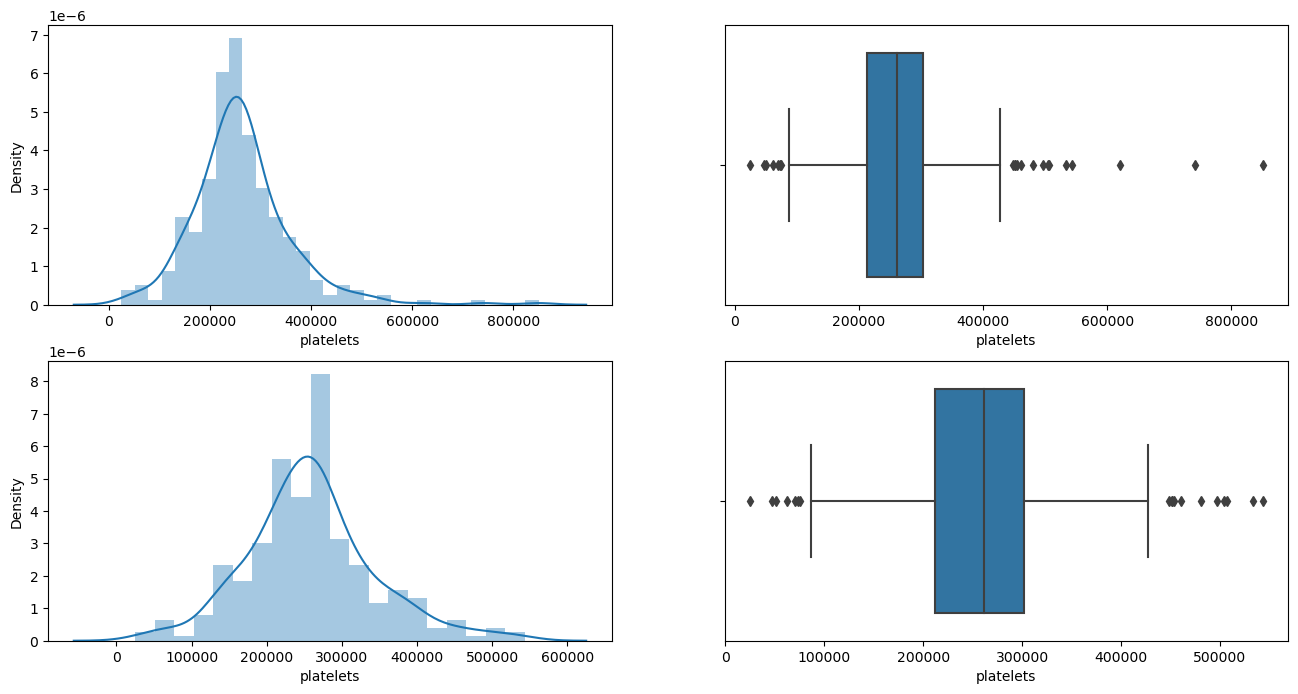

In [26]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['platelets'])
plt.subplot(2,2,2)
sns.boxplot(df['platelets'])
plt.subplot(2,2,3)
sns.distplot(new_df['platelets'])
plt.subplot(2,2,4)
sns.boxplot(new_df['platelets'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='serum_creatinine'>

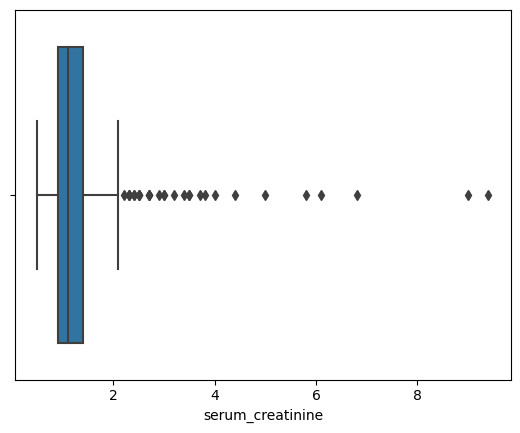

In [27]:
sns.boxplot(df['serum_creatinine'])

Normal range: 0.5-1.3 mg/dL

In [28]:
percentile25 = df['serum_creatinine'].quantile(0.25)
percentile75 = df['serum_creatinine'].quantile(0.75)

In [29]:
# iqr=percentile75-percentile25
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr
df[df['serum_creatinine'] > upper_limit]
df[df['serum_creatinine'] < lower_limit]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [30]:
new_df_cap = df.copy()
new_df_cap['serum_creatinine'] = np.where(
    new_df_cap['serum_creatinine'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['serum_creatinine'] < lower_limit,
        lower_limit,
        new_df_cap['serum_creatinine']))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

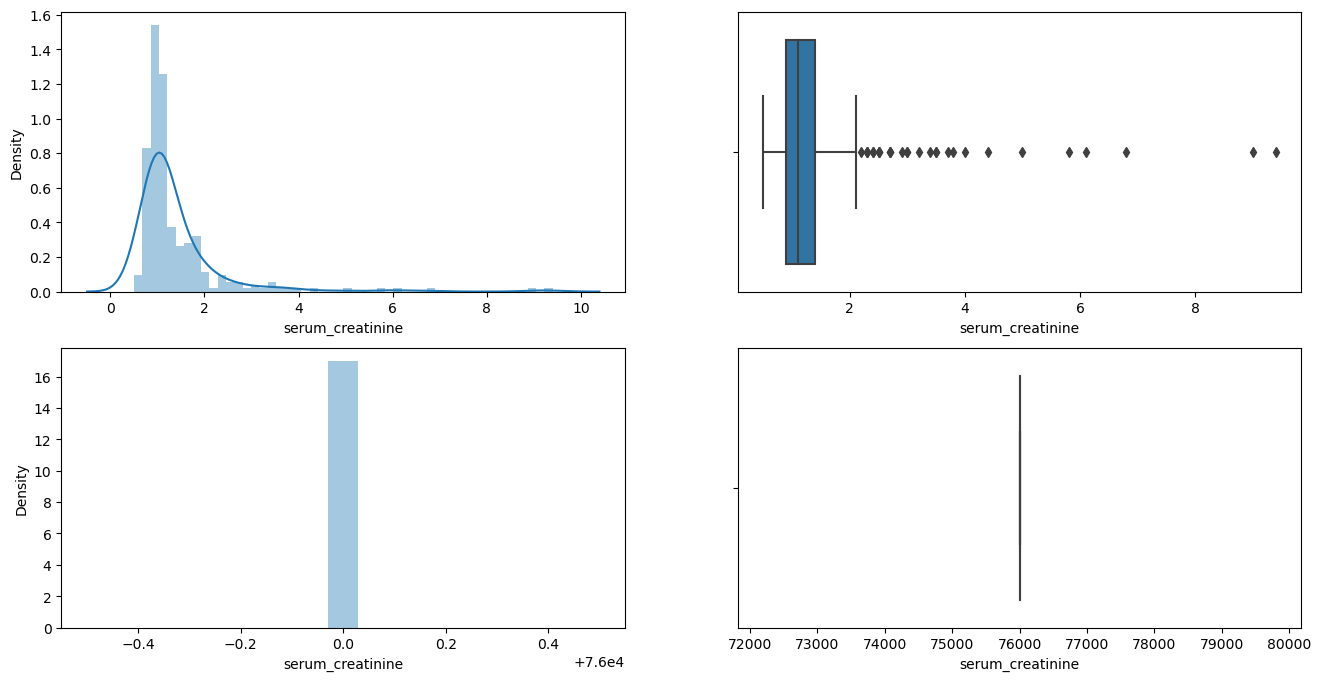

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['serum_creatinine'])
plt.subplot(2,2,2)
sns.boxplot(df['serum_creatinine'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['serum_creatinine'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['serum_creatinine'])
plt.show()

In [32]:
# import warnings
# warnings.filterwarnings('ignore')
# plt.figure(figsize=(16,5))
# plt.subplot(1,2,1)
# sns.distplot(new_df['creatinine_phosphokinase'])
# plt.subplot(1,2,2)
# sns.distplot(new_df['platelets'])
# plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

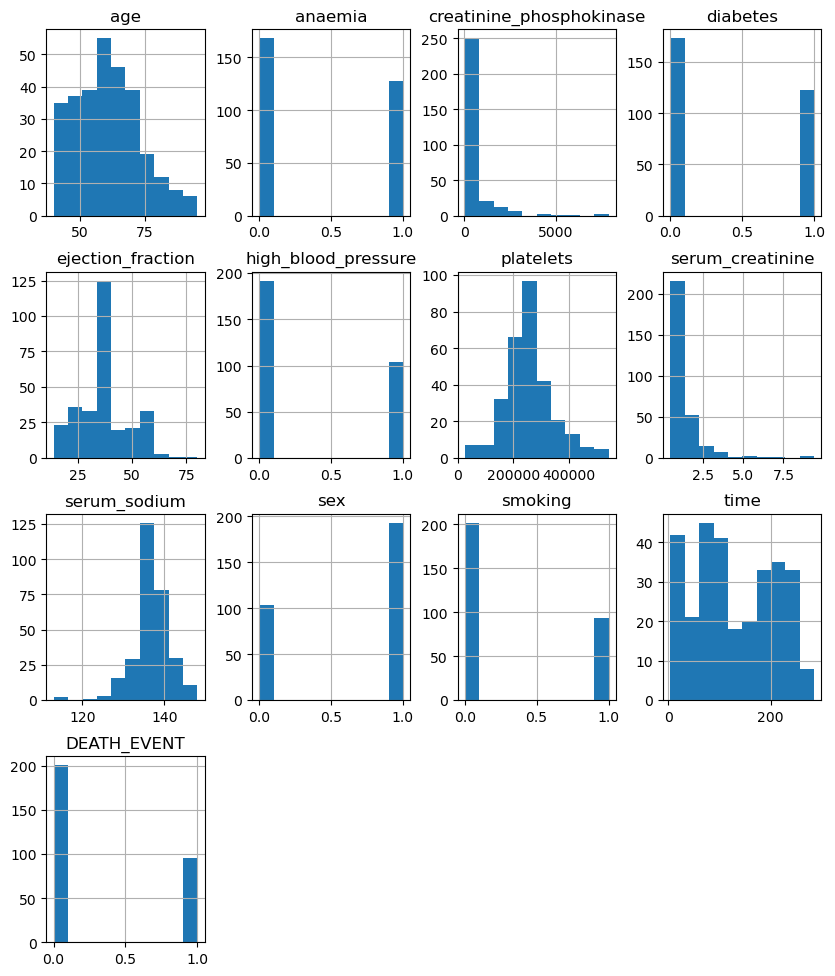

In [33]:
new_df.hist(figsize=(10,15),layout=(5,4))

<AxesSubplot:xlabel='sex', ylabel='count'>

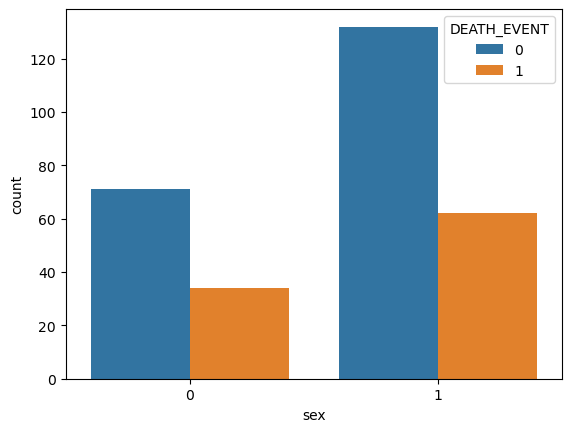

In [35]:
sns.countplot(x=df.sex,hue=df.DEATH_EVENT)

Gender has no specific affect on the death event

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

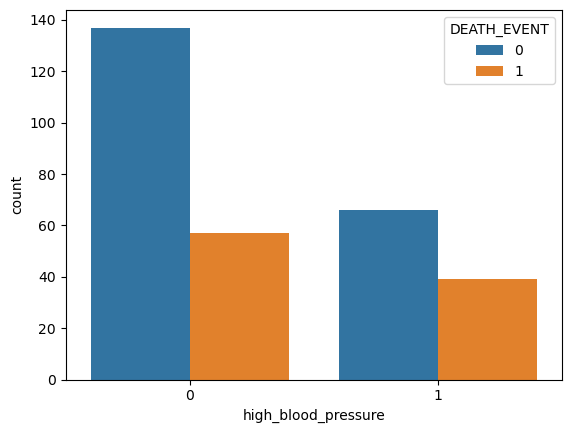

In [36]:
sns.countplot(x=df.high_blood_pressure,hue=df.DEATH_EVENT)

From above we can understand that BP has an affect on heart failure

Scaling the features

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols= new_df_cap.columns
scaler.fit(new_df_cap[cols])
new_df_cap[cols] = scaler.transform(new_df_cap[cols])
new_df_cap

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.0,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.0,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.0,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.0,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.0,0.085714,0.0,0.0,0.014235,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.0,0.857143,1.0,1.0,0.946619,0.0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.0,0.742857,0.0,0.0,0.950178,0.0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.0,0.714286,0.0,0.0,0.975089,0.0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.0,0.771429,1.0,1.0,0.982206,0.0


Splitting Training and Testing Data

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop(['DEATH_EVENT'], axis = 1)
y = df['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='liblinear')
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.8166666666666667

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model
model.fit(x_train,y_train)
model.score(x_train,y_train)

1.0

In [41]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=37)
model3.fit(x_train,y_train)
rfc=model3.score(x_test, y_test)
rfc

0.8166666666666667

In [42]:
# def cap_outliers(df, col_name, cap_value=None):
#     q1 = df[col_name].quantile(0.25)
#     q3 = df[col_name].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     if cap_value is None:
#         cap_value = upper_bound
#     df[col_name] = np.where(df[col_name] > upper_bound, cap_value, df[col_name])
#     df[col_name] = np.where(df[col_name] < lower_bound, cap_value, df[col_name])
#     return df


In [43]:
# # data = {'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]}
# # df = pd.DataFrame(data)

# # Cap outliers in column 'A' using the IQR method
# df = cap_outliers(df, 'serum_sodium')

# # Print the capped data frame
# print(df)


In [44]:
# features_with_outliers = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
# for feature in features_with_outliers:
#     q1 = data[feature].quantile(0.25)
#     q3 = data[feature].quantile(0.75)
#     IQR = q3-q1
#     lower_limit = q1 - (IQR*1.5)
#     upper_limit = q3 + (IQR*1.5)
#     data.loc[data[feature]<lower_limit,feature] = lower_limit
#     data.loc[data[feature]>upper_limit,feature] = upper_limit

In [45]:
# num_col = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]

# for i in num_col:
   
#     fig, axs = plt.subplots(1,2,figsize=(15, 3))

#     sns.histplot(data[i],bins=20, kde=True,ax=axs[0]);
#     sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);